# Linear regression

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from ufldl.linear_model import LinearRegression
from ufldl.datasets import load_housing

In [14]:
X = load_housing()

# split into train and test sets
np.random.shuffle(X)
split = int(X.shape[0] * 0.8)
train, test = X[:split, :], X[split:, :]

X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [15]:
model = LinearRegression(fit_intercept=True)
model.fit(X=X_train, y=y_train)
predicted_train_prices = model.predict(X=X_train)

# print root mean squared error (RMSE) for training set
train_rmse = np.sqrt(np.mean(predicted_train_prices - y_train) ** 2)

print('Train RMSE: {:.4}'.format(train_rmse))

Train RMSE: 0.04033


Test RMSE: 0.1439


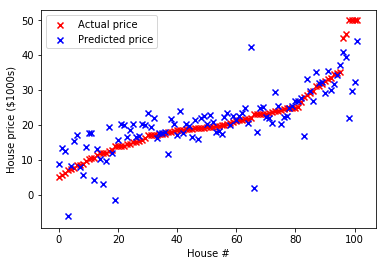

In [16]:
# print RMSE on test set
predicted_test_prices = model.predict(X=X_test)
test_rmse = np.sqrt(np.mean(predicted_test_prices - y_test) ** 2)

print('Test RMSE: {:.4}'.format(test_rmse))

# plot predictions in test data
prices = sorted(zip(y_test, predicted_test_prices))
plt.scatter(x=range(len(y_test)), y=[y for y, y_hat in prices],
            marker='x', color='red', label='Actual price')
plt.scatter(x=range(len(y_test)), y=[y_hat for y, y_hat in prices],
            marker='x', color='blue', label='Predicted price')
plt.xlabel('House #')
plt.ylabel('House price ($1000s)')
plt.legend()
plt.show()